# Homework 2
*Jinyi Zhou | u1424752 | May 29*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sb

## Part 1: A/B Hypothesis Testing

*Null hypothesis: A is better than B.*

In [2]:
# significance 1%
signif = 0.01
sampleSize = 1000
aSample = 500
bSample = 550
clicks = np.array([aSample, bSample])
stat, pValue = proportions_ztest(count=clicks, nobs=sampleSize,  alternative='two-sided')
print(stat)
print(pValue)

if pValue > signif:
    print ("Null hypothesis is incorrect. B is better than A.")
else:
    print ("Null hypothesis is correct. A is better than B.")

-2.238868314198227
0.025164485700318397
Null hypothesis is incorrect. B is better than A.


In [3]:
# significance 5%
signif = 0.05
sampleSize = 1000
aSample = 500
bSample = 550
clicks = np.array([aSample, bSample])
stat, pValue = proportions_ztest(count=clicks, nobs=sampleSize,  alternative='two-sided')
print(stat)
print(pValue)

if pValue > signif:
    print ("Null hypothesis is incorrect. B is better than A.")
else:
    print ("Null hypothesis is correct. A is better than B.")

-2.238868314198227
0.025164485700318397
Null hypothesis is correct. A is better than B.


## Part 2: Regression of real estate data

*Import and clean the data:*

In [4]:
data1 = pd.read_csv("realEstate1.csv")
data2 = pd.read_csv("realEstate2.csv")
data = [data1, data2]
data = pd.concat(data, ignore_index=True)
data = data[['Acres', 'Deck', 'GaragCap', 'Latitude', 'Longitude', 'LstPrice', 'Patio', 'PkgSpacs', 'PropType', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']]
data = data[data["LstPrice"] > 200000]
data = data[data["LstPrice"] < 1000000]
data.TotSqf = data.TotSqf.map(lambda x: int(x.replace(",", '')))
data = data[data.Longitude < 0] # removing
data = data[data.Taxes < 1000000] # as above

propertyTypes = data["PropType"]
data = pd.get_dummies(data)
data.reset_index(inplace=True, drop=True)
data


,Acres,Deck,GaragCap,Latitude,Longitude,LstPrice,Patio,PkgSpacs,SoldPrice,Taxes,TotBed,TotBth,TotSqf,YearBlt,PropType_Condo,PropType_Single Family,PropType_Townhouse
0,0.29,1,3,40.779524,-111.893542,725000,1,0,752000,7244,4.0,5.0,5415,1998,False,True,False
1,0.01,0,0,40.773243,-111.883291,205000,0,0,205000,1431,2.0,1.0,924,1965,True,False,False
2,0.11,0,0,40.773972,-111.867470,390000,1,0,390000,1816,3.0,1.0,1702,1940,False,True,False
3,0.14,0,1,40.783009,-111.872100,445000,1,3,443000,3260,3.0,2.0,1756,1940,False,True,False
4,0.01,0,2,40.771693,-111.886951,339000,0,2,334000,2141,3.0,2.0,1368,1976,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,0.28,1,3,40.782933,-111.851143,995000,0,6,949000,6658,6.0,4.0,5740,1978,False,True,False
255,0.01,0,2,40.770904,-111.886201,349999,2,2,340000,1877,2.0,2.0,1473,1979,True,False,False
256,0.00,0,0,40.773843,-111.891911,249900,0,0,231000,2812,2.0,2.0,1385,1976,True,False,False
257,0.07,0,1,40.772835,-111.854867,330000,0,0,310000,2079,5.0,3.0,2094,1886,False,True,False


*Exploratory data analysis:*

*From the above results, we can see that there are 259 data and 14 variables. After removing the unreasonable values, the values are now reasonable.*

In [5]:
data.describe()

,Acres,Deck,GaragCap,Latitude,Longitude,LstPrice,Patio,PkgSpacs,SoldPrice,Taxes,TotBed,TotBth,TotSqf,YearBlt
count,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000
mean,0.130656,0.752896,1.270270,40.777522,-111.875806,463493.293436,0.830116,1.061776,450840.694981,4586.374517,3.223938,2.532819,2482.957529,1940.162162
std,0.123357,1.242318,0.974642,0.005817,0.013933,196814.079526,3.385173,1.593363,187049.630334,20110.677828,1.221594,1.075576,1210.138045,36.389644
min,0.000000,0.000000,0.000000,40.769424,-111.913645,205000.000000,0.000000,0.000000,205000.000000,1.000000,1.000000,0.000000,844.000000,1852.000000
25%,0.050000,0.000000,0.000000,40.772402,-111.886691,311950.000000,0.000000,0.000000,308250.000000,1880.000000,2.000000,2.000000,1551.000000,1908.000000
50%,0.110000,1.000000,1.000000,40.775774,-111.874094,414500.000000,1.000000,0.000000,400000.000000,2449.000000,3.000000,2.000000,2262.000000,1937.000000
75%,0.160000,1.000000,2.000000,40.782083,-111.866080,589450.000000,1.000000,2.000000,562750.000000,3853.500000,4.000000,3.000000,3044.500000,1976.000000
max,0.690000,16.000000,5.000000,40.791059,-111.843083,999900.000000,54.000000,8.000000,980000.000000,311262.000000,8.000000,7.000000,7508.000000,2015.000000


<Axes: xlabel='PropType'>

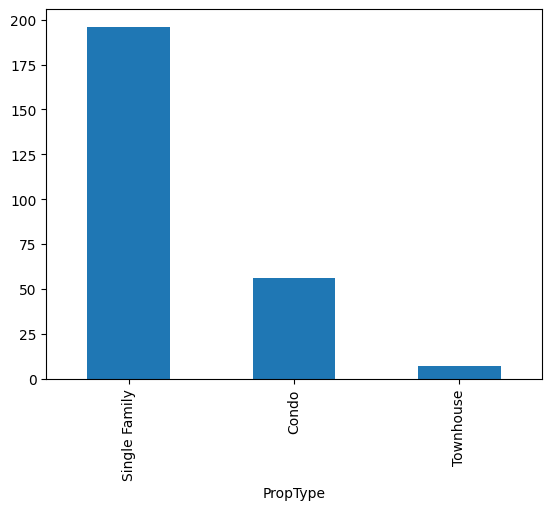

In [6]:
propertyTypes.value_counts().plot.bar()

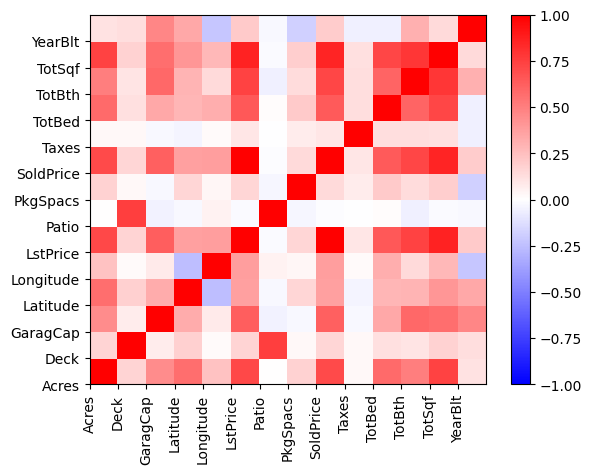

In [7]:
corr = data[data.columns[:-3]].corr() # can't convert, omit

heatmap = plt.pcolor(corr, vmin=-1, vmax=1, cmap=plt.cm.bwr)
plt.colorbar(heatmap)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
plt.yticks(range(len(corr.columns)), corr.columns);

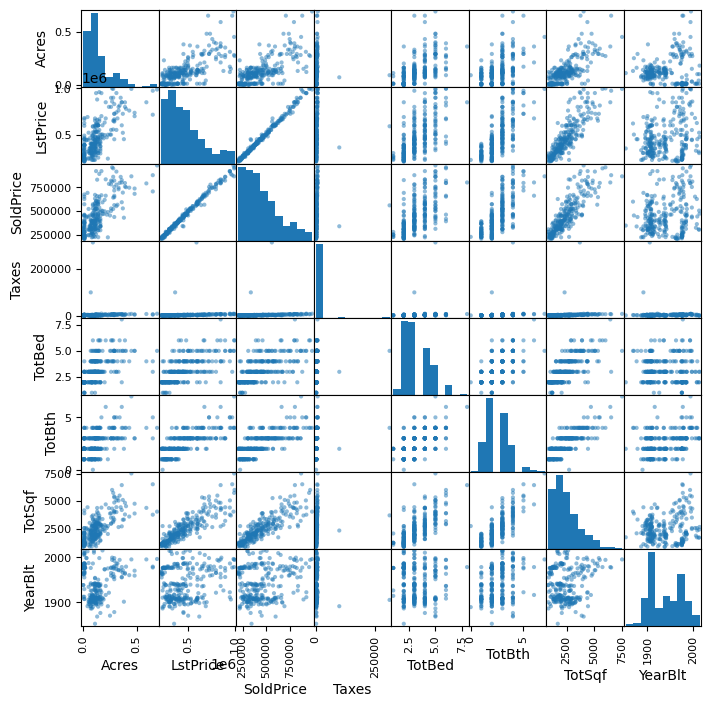

In [8]:
pd.plotting.scatter_matrix(data[ ['Acres', 'LstPrice', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']], figsize=(8, 8))
plt.show()

*Findings: Sold prices, list prices and taxes are very correlated. When the listing price goes up, all the other columns like tax also go up.*

### Task 4: Geospatial Plot

<Axes: xlabel='Latitude', ylabel='Longitude'>

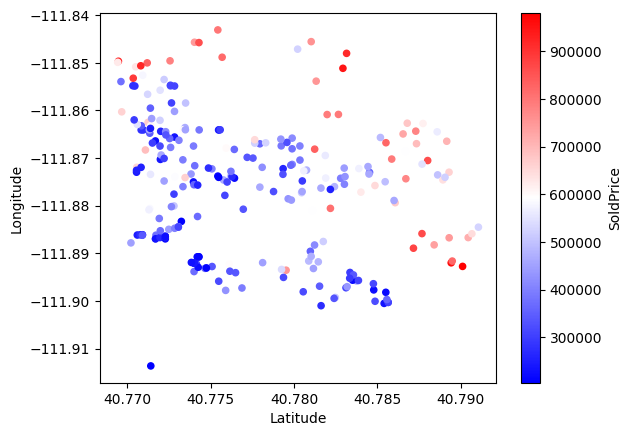

In [9]:
data.plot.scatter(x="Latitude", y="Longitude", c="SoldPrice", cmap='bwr')

*The prices increase when it's more North and East. The prices go down when it's far away from the North and East.*

### Task 5: Simple Linear Regression

In [10]:
regression = smf.ols('SoldPrice ~ LstPrice', data=data).fit()
print(regression.summary())

                            OLS Regression Results                            
Dep. Variable:              SoldPrice   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.535e+04
Date:                Wed, 28 Jun 2023   Prob (F-statistic):          7.94e-259
Time:                        15:29:34   Log-Likelihood:                -2915.1
No. Observations:                 259   AIC:                             5834.
Df Residuals:                     257   BIC:                             5841.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.256e+04   2989.712      4.201      0.0

In [11]:
sfReg = smf.ols('SoldPrice ~ TotSqf', data=data).fit()
print(sfReg.summary())

                            OLS Regression Results                            
Dep. Variable:              SoldPrice   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     703.5
Date:                Wed, 28 Jun 2023   Prob (F-statistic):           1.55e-75
Time:                        15:29:34   Log-Likelihood:                -3340.3
No. Observations:                 259   AIC:                             6685.
Df Residuals:                     257   BIC:                             6692.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.224e+05   1.38e+04      8.887      0.0

In [12]:
yearReg = smf.ols('SoldPrice ~ YearBlt', data=data).fit()
print(yearReg.summary())

                            OLS Regression Results                            
Dep. Variable:              SoldPrice   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     10.95
Date:                Wed, 28 Jun 2023   Prob (F-statistic):            0.00107
Time:                        15:29:34   Log-Likelihood:                -3505.6
No. Observations:                 259   AIC:                             7015.
Df Residuals:                     257   BIC:                             7022.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.565e+06   6.09e+05     -2.568      0.0

In [13]:
data.head()

,Acres,Deck,GaragCap,Latitude,Longitude,LstPrice,Patio,PkgSpacs,SoldPrice,Taxes,TotBed,TotBth,TotSqf,YearBlt,PropType_Condo,PropType_Single Family,PropType_Townhouse
0,0.29,1,3,40.779524,-111.893542,725000,1,0,752000,7244,4.0,5.0,5415,1998,False,True,False
1,0.01,0,0,40.773243,-111.883291,205000,0,0,205000,1431,2.0,1.0,924,1965,True,False,False
2,0.11,0,0,40.773972,-111.867470,390000,1,0,390000,1816,3.0,1.0,1702,1940,False,True,False
3,0.14,0,1,40.783009,-111.872100,445000,1,3,443000,3260,3.0,2.0,1756,1940,False,True,False
4,0.01,0,2,40.771693,-111.886951,339000,0,2,334000,2141,3.0,2.0,1368,1976,True,False,False


<Axes: xlabel='LstPrice', ylabel='SoldPrice'>

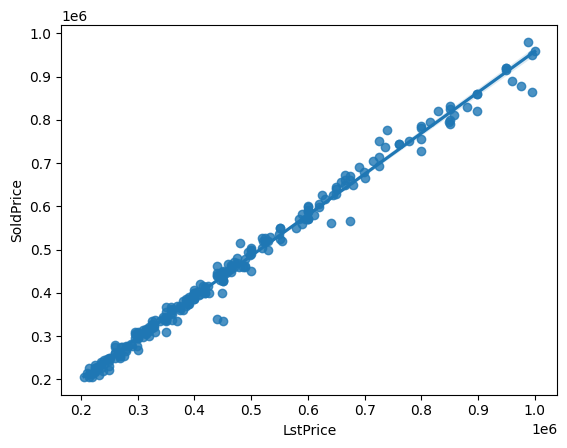

In [14]:
sb.regplot(x='LstPrice', y='SoldPrice', data=data)

<Axes: xlabel='TotSqf', ylabel='SoldPrice'>

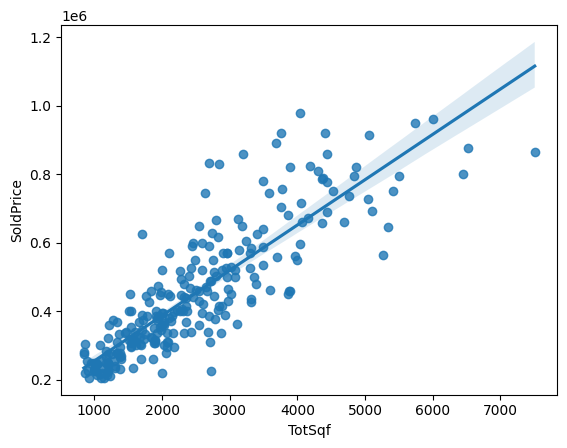

In [15]:
sb.regplot(x='TotSqf', y='SoldPrice', data=data)

<Axes: xlabel='YearBlt', ylabel='SoldPrice'>

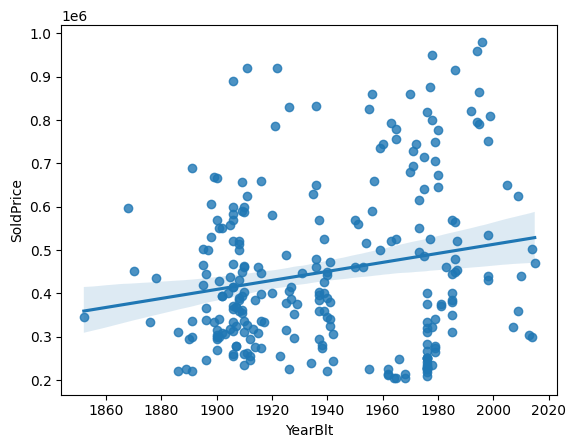

In [16]:
sb.regplot(x='YearBlt', y='SoldPrice', data=data)

### Task 6: Multilinear Regression

In [17]:
multi_regression = smf.ols(formula="SoldPrice ~ Taxes + TotSqf + Acres + GaragCap", data=data).fit()
multi_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     215.7
Date:                Wed, 28 Jun 2023   Prob (F-statistic):           2.07e-80
Time:                        15:29:34   Log-Likelihood:                -3319.3
No. Observations:                 259   AIC:                             6649.
Df Residuals:                     254   BIC:                             6666.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.304e+05   1.34e+04      9.760      0.000    1.04e+05    1.57e+05
Taxes          0.1771      0.284      0.624      0.533      -0.382       0.736
TotSqf        96.4557      7.522     12.823      0.000      81.642     111.270
Acres       2.429e+05   6.73e+04      3.608      0.000     1.1e+05    3.75e+05
GaragCap     3.81e+04   7008.381      5.436      0.000    2.43e+04    5.19e+04
==============================================================================
Omnibus:                       41.189   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.516
Skew:                           0.826   Prob(JB):                     5.41e-18
Kurtosis:                       5.153   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
param = dict(multi_regression.params)
print("R2:", multi_regression.rsquared)

R2: 0.7725663096166876



- Often the price per square foot for a house is advertised. Is this what the coefficient for TotSqf is measuring? Provide an interpretation for the coefficient for TotSqf.


In [19]:
print(param['TotSqf'])

96.45573318869985


- Estimate the value that each Garage space adds to a house.

In [20]:
print(param['GaragCap'])

38099.70523020625


- Does latitude or longitude have an impact on house price? Explain.

*I think longitude does affect the price to some extent.*

- If we wanted to start a 'house flipping' company, we'd have to be able to do a better job of predicting the sold price than the list price does. How does your model compare?

*It does a worse job based on the model.*

### Task 7: Incorporating a Categorical Variable

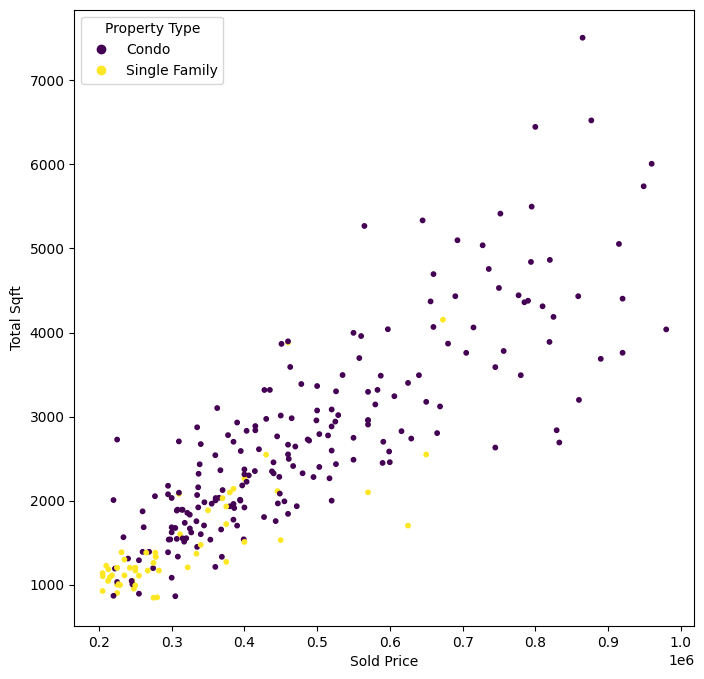

In [21]:
color_dict = {'Single Family': 'red', 'Condo': 'blue', 'Townhouse': 'green'}
PropType_Condo = data.PropType_Condo
plt.figure(figsize=(8, 8))
scatter = plt.scatter(y=data.TotSqf, x=data.SoldPrice, c=PropType_Condo, s=10)
plt.xlabel('Sold Price')
plt.ylabel('Total Sqft')
prop_names = ['Condo', 'Single Family', 'Townhouse']
plt.legend(handles=scatter.legend_elements()[0], labels=prop_names, title="Property Type")